In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Model


from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau

from tensorflow.keras import layers

import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.applications import MobileNetV2,EfficientNetB0
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [47]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(r'C:\Users\dell\OneDrive\Desktop\Data analytics files\Dataset', validation_split=0.2, subset="training", shuffle=True, seed = 2021, labels='inferred', batch_size=32, image_size=(224,224))
val_ds = tf.keras.preprocessing.image_dataset_from_directory(r'C:\Users\dell\OneDrive\Desktop\Data analytics files\Dataset', validation_split=0.2, subset="validation", shuffle=True, seed = 2021, labels='inferred', batch_size=32, image_size=(224,224))

Found 8982 files belonging to 3 classes.
Using 7186 files for training.
Found 8982 files belonging to 3 classes.
Using 1796 files for validation.


In [49]:
train_ds.class_names

['mask_weared_incorrect', 'with_mask', 'without_mask']

In [50]:
class_name = ["Incorrect","With_Mask","Without_Mask"]

for image_batch,labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [51]:
image_batch,labels_batch = next(iter(train_ds))
image_batch[0],labels_batch[0]

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[  5.        ,   3.        ,   4.        ],
         [ 18.214289  ,  16.214289  ,  17.214289  ],
         [ 39.357143  ,  37.357143  ,  38.357143  ],
         ...,
         [125.14287   , 125.14287   , 125.14287   ],
         [126.28572   , 126.28572   , 126.28572   ],
         [127.        , 127.        , 127.        ]],
 
        [[  3.5714283 ,   1.9285712 ,   2.5714283 ],
         [ 13.469389  ,  11.826532  ,  12.469389  ],
         [ 29.306122  ,  27.663265  ,  28.306122  ],
         ...,
         [126.57144   , 126.57144   , 126.57144   ],
         [127.714294  , 127.714294  , 127.714294  ],
         [128.42857   , 128.42857   , 128.42857   ]],
 
        [[  1.2857141 ,   0.21428561,   0.28571415],
         [  5.877551  ,   4.806123  ,   4.877551  ],
         [ 13.224489  ,  12.153061  ,  12.224489  ],
         ...,
         [128.85715   , 128.85715   , 128.85715   ],
         [130.        , 130.        , 130.      

In [52]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# read photo of wearing mask 

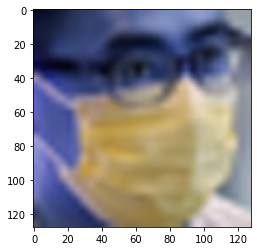

In [16]:
image1 =  cv2.imread("40.png")
plt.imshow(image1)

# read photo of non wearing mask

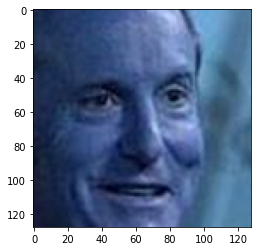

In [17]:
image2 = cv2.imread("6.png")
plt.imshow(image2)

# read photo of incorrect wearing mask

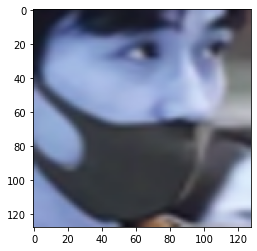

In [53]:
image3 = cv2.imread("2.png")
plt.imshow(image3)

# Model (pre-trained)

In [54]:
model = tf.keras.Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(224,224,3)))
model.add(MobileNetV2(weights="imagenet",include_top=False))

model.add(layers.AveragePooling2D(pool_size=(7,7)))
model.add(layers.Flatten())

model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(3, activation='softmax'))

In [57]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x0000018FC201F2B0>>

In [56]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [58]:
save_best = tf.keras.callbacks.ModelCheckpoint("MaskDetection.h5",monitor='val_accuracy',save_best_only=True, verbose=1)

model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=[save_best])

Epoch 1/10
225/225 [==============================] - ETA: 0s - loss: 0.1651 - accuracy: 0.9463
Epoch 1: val_accuracy improved from -inf to 0.61247, saving model to MaskDetection.h5
225/225 [==============================] - 1261s 6s/step - loss: 0.1651 - accuracy: 0.9463 - val_loss: 9.5717 - val_accuracy: 0.6125
Epoch 2/10
225/225 [==============================] - ETA: 0s - loss: 0.0821 - accuracy: 0.9751
Epoch 2: val_accuracy did not improve from 0.61247
225/225 [==============================] - 1245s 6s/step - loss: 0.0821 - accuracy: 0.9751 - val_loss: 17.8795 - val_accuracy: 0.3942
Epoch 3/10
225/225 [==============================] - ETA: 0s - loss: 0.0396 - accuracy: 0.9879
Epoch 3: val_accuracy improved from 0.61247 to 0.84911, saving model to MaskDetection.h5
225/225 [==============================] - 1259s 6s/step - loss: 0.0396 - accuracy: 0.9879 - val_loss: 1.9105 - val_accuracy: 0.8491
Epoch 4/10
225/225 [==============================] - ETA: 0s - loss: 0.0490 - accurac

In [59]:
model.evaluate(val_ds)

57/57 [==============================] - 50s 862ms/step - loss: 12.6628 - accuracy: 0.3959


[12.662753105163574, 0.39587974548339844]

In [60]:
model.evaluate(train_ds)

225/225 [==============================] - 194s 864ms/step - loss: 12.1358 - accuracy: 0.4115


[12.135812759399414, 0.41149458289146423]

In [63]:
from PIL import Image

In [64]:
resize = 224
label = ("Mask!","without_Mask","mask_weared_incorrect")

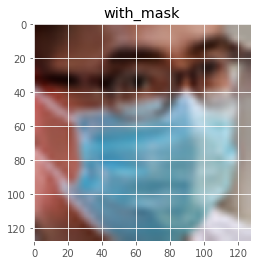

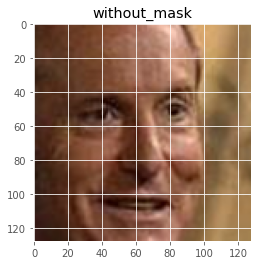

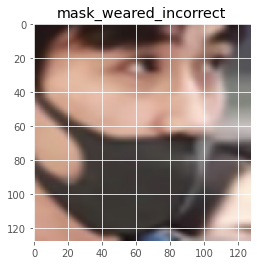

In [65]:
image1 = Image.open("40.png")
image2 = Image.open("6.png")
image3 = Image.open("2.png")

plt.figure('image1')
plt.title("with_mask")
plt.imshow(image1)

plt.figure('image2')
plt.title("without_mask")
plt.imshow(image2)


plt.figure("image3")
plt.title("mask_weared_incorrect")
plt.imshow(image3)